#### 1- Utilizando OpenCV, conte a quantidade de objetos na imagem abaixo.
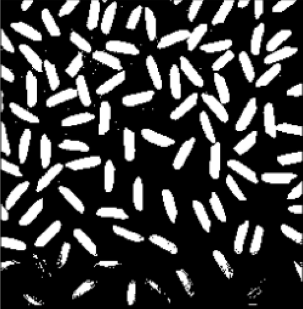

In [ ]:
import cv2
import matplotlib.pyplot as plt

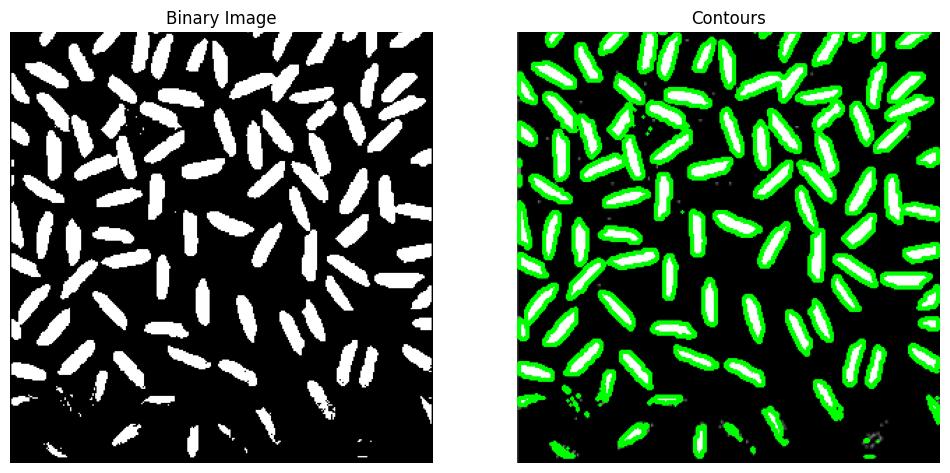


Quantidade de objetos na imagem:  122


In [ ]:
# Leitura e exbição da imagem
image = cv2.imread('image.png', 0)

# Limiarização
_, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Find contours of the objects
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count the objects based on contours
object_count = len(contours)

# Create a color image to visualize the contours
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_color, contours, -1, (0, 255, 0), 2)

# Show the original image and the image with contours
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(thresh, cmap='gray')
ax[0].set_title('Binary Image')
ax[0].axis('off')

ax[1].imshow(image_color)
ax[1].set_title('Contours')
ax[1].axis('off')

plt.show()

print("\nQuantidade de objetos na imagem: ", object_count)

#### 2- Utilizando OpenCV, conte a quantidade de objetos na imagem abaixo.
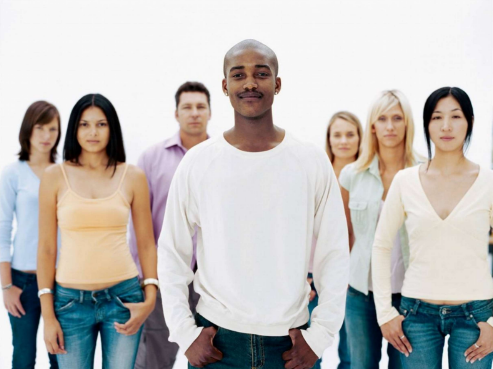


In [29]:
!git clone https://github.com/pjreddie/darknet
%cd darknet
! make

fatal: destination path 'darknet' already exists and is not an empty directory.
/content/darknet/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall

In [30]:
!chmod +x ./darknet

In [41]:
# Ajustar threshold
!./darknet detect cfg/yolov3-tiny.cfg /content/yolov3-tiny.weights /content/image_2.png -thresh 0.3

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

### 3- Treine um classificador de carros utilizando deep learning

In [42]:
# Obs: Tive problemas de internet na hora de baixar o dataset e já estava no final do prazo. Vou deixar um código genérico
# de um modelo de classificação

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from torchvision.datasets import ImageFolder
from sklearn.metrics import accuracy_score

In [44]:
# Definindo as transformações de pré-processamento das imagens
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Redimensiona para o tamanho que a ResNet espera
    transforms.ToTensor(),  # Converte a imagem para tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalização
])

# Carregando o dataset (você precisará ajustar o caminho do diretório)
dataset = ImageFolder(root='/dataset/', transform=transform)

# Separar o dataset em treino e teste
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/your/dataset'

In [45]:
# Carregar os dados em lotes
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


NameError: name 'train_dataset' is not defined

In [46]:
# Usar a ResNet pré-treinada e substituir a última camada FC para o número de classes do seu dataset
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # num_classes deve ser o número de classes no seu dataset


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 68.5MB/s]


In [47]:
# Definir função de perda e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Mover o modelo para o dispositivo apropriado (GPU ou CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Treinar o modelo
for epoch in range(num_epochs):  # num_epochs é o número de épocas que você quer treinar
    model.train()  # Colocar o modelo em modo de treino
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zerar os gradientes do otimizador
        optimizer.zero_grad()

        # Passar os dados pelo modelo
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

NameError: name 'num_epochs' is not defined

In [ ]:
# Avaliar o modelo
model.eval()  # Colocar o modelo em modo de avaliação
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calcular a acurácia
accuracy = accuracy_score(all_labels, all_preds)
print(f'Acurácia: {accuracy * 100}%')